In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor                        

from sklearn.metrics import *
from src.model_helper import *

%matplotlib inline
plt.style.use('ggplot')

### load and split data

In [3]:
df = pd.read_csv('data/processed_data.csv')
df.shape

(48879, 237)

In [ ]:
df.head()

In [71]:
X_train, X_test, y_train, y_test = load_and_split_data()

In [72]:
print(f'X_train shape:  {X_train.shape}')
print(f'y_train length: {len(y_train)}')
print(f'y_train + y_test length: {len(y_train)+len(y_test)}')
print((len(y_train)+len(y_test))==df.shape[0])

X_train shape:  (36659, 236)
y_train length: 36659
y_train + y_test length: 48879
True


In [73]:
y_test[:10]

19625    265
8473      59
37155     50
43737     33
24745     33
43723    475
10676     42
43721    390
27699    700
28965    100
Name: price, dtype: int64

#### Linear Regression

In [78]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_y_pred = lr.predict(X_test)

In [79]:
def rmsle(actual, predictions):
    log_diff = np.log(predictions+1) - np.log(actual+1)
    return np.sqrt(np.mean(log_diff**2))

In [80]:
lr_mse = mean_squared_error(y_test, lr_y_pred)
print(f'mse for LinearRegression: {lr_mse}')
print(f'R2 for LinearRegression: {lr.score(X_train, y_train)}')
# lr_mlse=mean_squared_log_error(y_test, lr_y_pred)

mse for LinearRegression: 33503.132384384735
R2 for LinearRegression: 0.10968501095473993


In [90]:
(lr_y_pred<0).sum()

52

#### Define models

In [81]:
lr = LinearRegression()

rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=1)

gdbr = GradientBoostingRegressor(learning_rate=0.1, loss='ls',
                                 n_estimators=100, random_state=1)

abr = AdaBoostRegressor(DecisionTreeRegressor(), learning_rate=0.1,
                                 loss='linear', n_estimators=100, random_state=1)

#### compare model score

In [82]:
# from sklearn.model_selection import cross_val_score
# def cross_val(model, X, y, nfolds):
    
#     mse = cross_val_score(model, X, y, 
#                           scoring='neg_mean_squared_error',
#                           cv=nfolds, n_jobs=-1) * -1
#     r2  = cross_val_score(model, X, y, 
#                           scoring='r2',
#                           cv=nfolds, n_jobs=-1)
#     mean_mse = mse.mean()
#     mean_r2 = r2.mean()
#     name = model.__class__.__name__
#     print(f'{name}  Train CV | MSE: {mean_mse.round(2)} | R2: {mean_r2.round(3)}')
#     return mean_mse,mean_r2 

In [84]:
k = 10 # number of folds in the cross-validation 
cross_val(lr, X_train, y_train, k) 
cross_val(rf, X_train, y_train, k) 
cross_val(gdbr, X_train, y_train, k) 
cross_val(abr, X_train, y_train, k); 

LinearRegression  Train CV | MSE: 1.6213094469414884e+16 | R2: -229268990926.838
RandomForestRegressor  Train CV | MSE: 59425.58 | R2: 0.071
GradientBoostingRegressor  Train CV | MSE: 56229.54 | R2: 0.144
AdaBoostRegressor  Train CV | MSE: 67537.58 | R2: -0.068


####  Choosing GradientBoostingRegressor

In [ ]:
#Try some gradient boosting regressor with different n_estimators

In [96]:
#learning_rate=1.0
gdbr_lr10 = GradientBoostingRegressor(learning_rate=1.0, loss='ls',
                                     n_estimators=100, random_state=1) 

In [97]:
# learning_rate=0.8
gdbr_lr8 = GradientBoostingRegressor(learning_rate=0.8,loss='ls',
                                     n_estimators=100, random_state=1) 

In [98]:
# learning_rate=0.5
gdbr_lr5 = GradientBoostingRegressor(learning_rate=0.5, loss='ls',
                                     n_estimators=100, random_state=1) 

In [99]:
# learning_rate=0.3
gdbr_lr3 = GradientBoostingRegressor(learning_rate=0.3, loss='ls',
                                     n_estimators=100, random_state=1) 

In [101]:
print("Cross validation score of Gradient Boosting Regressor with lr = 0.1:")
cross_val(gdbr, X_train, y_train, k) 
print("Cross validation score of Gradient Boosting Regressor with lr = 0.3:")
cross_val(gdbr_lr3, X_train, y_train, k)
print("Cross validation score of Gradient Boosting Regressor with lr = 0.5:")
cross_val(gdbr_lr5, X_train, y_train, k)
print("Cross validation score of Gradient Boosting Regressor with lr = 0.8:")
cross_val(gdbr_lr8, X_train, y_train, k)
print("Cross validation score of Gradient Boosting Regressor with lr = 1.0:")
cross_val(gdbr_lr10, X_train, y_train, k);

Cross validation score of Gradient Boosting Regressor with lr = 0.1:
GradientBoostingRegressor  Train CV | MSE: 56229.54 | R2: 0.144
Cross validation score of Gradient Boosting Regressor with lr = 0.3:
GradientBoostingRegressor  Train CV | MSE: 58143.46 | R2: 0.115
Cross validation score of Gradient Boosting Regressor with lr = 0.5:
GradientBoostingRegressor  Train CV | MSE: 66882.39 | R2: -0.043
Cross validation score of Gradient Boosting Regressor with lr = 0.8:


KeyboardInterrupt: 

In [105]:
#n_estimators =50
# nums50 = 50
gdbr_ne50 = GradientBoostingRegressor(learning_rate=0.1, loss='ls',
                                     n_estimators=50, random_state=1)
#n_estimators =200
gdbr_ne200 = GradientBoostingRegressor(learning_rate=0.1, loss='ls',
                                     n_estimators=200, random_state=1)
#n_estimators =300
gdbr_ne300 = GradientBoostingRegressor(learning_rate=0.1, loss='ls',
                                     n_estimators=300, random_state=1)


In [106]:
print("Cross validation score of Gradient Boosting Regressor with ne = 50:")
cross_val(gdbr_ne50, X_train, y_train, k) 
print("Cross validation score of Gradient Boosting Regressor with n_estimators = 100:")
cross_val(gdbr, X_train, y_train, k)
print("Cross validation score of Gradient Boosting Regressor with n_estimators = 200:")
cross_val(gdbr_ne200, X_train, y_train, k)
print("Cross validation score of Gradient Boosting Regressor with n_estimators = 300:")
cross_val(gdbr_ne300, X_train, y_train, k)

Cross validation score of Gradient Boosting Regressor with ne = 50:
GradientBoostingRegressor  Train CV | MSE: 56416.36 | R2: 0.14
Cross validation score of Gradient Boosting Regressor with n_estimators = 100:
GradientBoostingRegressor  Train CV | MSE: 56229.54 | R2: 0.144
Cross validation score of Gradient Boosting Regressor with n_estimators = 200:
GradientBoostingRegressor  Train CV | MSE: 56700.93 | R2: 0.14
Cross validation score of Gradient Boosting Regressor with n_estimators = 300:


KeyboardInterrupt: 

#### Tuning the number of estimators

In [107]:
N_ESTIMATORS = 3000

FileNotFoundError: [Errno 2] No such file or directory: 'plots/training-and-testing-error.png'

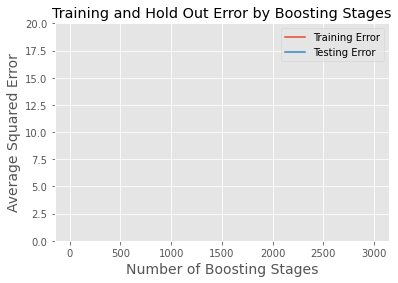

In [113]:
fig, ax = plt.subplots()
model = GradientBoostingRegressor(n_estimators=N_ESTIMATORS, 
                                  learning_rate=0.01)
model.fit(X_train, y_train)

train_score = np.zeros(N_ESTIMATORS)
for i, y_pred in enumerate(model.staged_predict(X_train)):
    train_score[i] = model.loss_(y_train, y_pred)

test_score = np.zeros(N_ESTIMATORS)
for i, y_pred in enumerate(model.staged_predict(X_test)):
    test_score[i] = model.loss_(y_test, y_pred)
    
ax.plot(np.arange(N_ESTIMATORS) + 1, train_score,
        label="Training Error")
ax.plot(np.arange(N_ESTIMATORS) + 1, test_score,
        label="Testing Error")
ax.set_title("Training and Hold Out Error by Boosting Stages")
ax.set_xlabel('Number of Boosting Stages', fontsize=14)
ax.set_ylabel('Average Squared Error', fontsize=14)
ax.legend(loc="upper right")
ax.set_ylim([0, 20])
plt.savefig('plots/training-and-testing-error.png', bbox_inches='tight')

In [115]:
model.score(X_train, y_train)

0.38836562852594225